In [16]:
#Performing data cleaning- same as in regression_continents file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import pycountry_convert as pc
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("./FPData2.csv")
df.columns = ['Country', 'year', 'ladder', 'gdp', 'support', 'life_expec', 'freedom', 'generosity','corruption','positive', 'negative']
y = df.groupby('Country').count()
less = y[y['year'] <= 10].index.tolist()
df_update = df[~df['Country'].isin(less)]
year_list = range(2011, 2020)
df_11 = df_update[df_update['year'].isin(year_list)]
y1 = df_11.groupby('Country').count()
less1 = y1[y1['year'] <= 8].index.tolist()
df_update1 = df_11[~df_11['Country'].isin(less1)]
df_update2 = df_update1.dropna()

def continent(name):
    part1 = pc.country_name_to_country_alpha2(name)
    code = pc.country_alpha2_to_continent_code(part1)
    continent = pc.convert_continent_code_to_continent_name(code)
    return continent
df_update2['Country'] = df_update2['Country'].replace({'Congo (Brazzaville)':'Congo'})
df_update2['Country'] = df_update2['Country'].replace({'Turkiye':'Turkey'})
df_update2['Continent'] = df_update2.apply(lambda row: continent(row.Country), axis=1)
def cont_val(continent):
    continents = ['Asia', 'Africa', 'North America', 'South America', 'Oceania', 'Europe']
    return continents.index(continent)
df_update2['Continent'] = df_update2.apply(lambda row: cont_val(row.Continent), axis=1)

In [17]:
df_ind = df_update2.set_index('Country')
df_ind

,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
Country,,,,,,,,,,,
Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267,0
Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268,0
Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273,0
Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375,0
Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339,0
...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,2015,3.703,7.747,0.736,51.200,0.667,-0.107,0.810,0.639,0.179,1
Zimbabwe,2016,3.735,7.735,0.768,51.675,0.733,-0.079,0.724,0.685,0.209,1
Zimbabwe,2017,3.638,7.754,0.754,52.150,0.753,-0.081,0.751,0.734,0.224,1


In [18]:
df_country = df_ind.groupby(['Country']).mean()
df_country

,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
Country,,,,,,,,,,,
Afghanistan,2015.000000,3.361333,7.646222,0.506556,52.627778,0.469000,0.042333,0.853444,0.474333,0.349778,0.0
Albania,2015.000000,4.944333,9.400778,0.690444,68.716667,0.693444,-0.084111,0.882889,0.562889,0.311111,5.0
Argentina,2015.000000,6.393222,10.067778,0.903444,66.822222,0.807667,-0.180222,0.830778,0.747778,0.282778,3.0
Armenia,2015.000000,4.535667,9.355000,0.729889,66.038889,0.600556,-0.194000,0.837222,0.506778,0.441556,0.0
Australia,2015.000000,7.275778,10.769778,0.943444,70.594444,0.925000,0.261444,0.402889,0.734333,0.210111,4.0
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2015.000000,5.678222,8.047556,0.905222,64.950000,0.625000,-0.081667,0.821444,0.771000,0.284444,3.0
Vietnam,2014.833333,5.358333,9.000333,0.831333,64.913333,0.891500,-0.067333,0.787167,0.581333,0.196500,0.0
Yemen,2014.571429,3.747286,7.918857,0.715000,58.232143,0.623571,-0.148429,0.819571,0.454571,0.277000,0.0


In [11]:
# SCREE PLOT

# Scaling
scaler = StandardScaler()
scaler.fit(df_ind)

df_scaled = scaler.transform(df_ind)

# PCA
pca = PCA(n_components=4)
model = pca.fit(df_scaled)

Z = pca.transform(df_scaled)

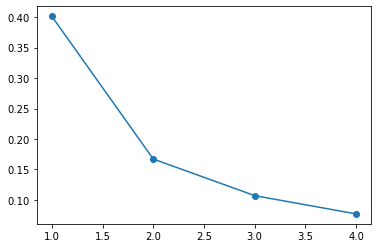

In [12]:
plt.plot(np.arange(1, 5), model.explained_variance_ratio_, marker='o')

In [19]:
countries = df_country.groupby('Country').mean().reset_index()

countries

,Country,year,ladder,gdp,support,life_expec,freedom,generosity,corruption,positive,negative,Continent
0,Afghanistan,2015.000000,3.361333,7.646222,0.506556,52.627778,0.469000,0.042333,0.853444,0.474333,0.349778,0.0
1,Albania,2015.000000,4.944333,9.400778,0.690444,68.716667,0.693444,-0.084111,0.882889,0.562889,0.311111,5.0
2,Argentina,2015.000000,6.393222,10.067778,0.903444,66.822222,0.807667,-0.180222,0.830778,0.747778,0.282778,3.0
3,Armenia,2015.000000,4.535667,9.355000,0.729889,66.038889,0.600556,-0.194000,0.837222,0.506778,0.441556,0.0
4,Australia,2015.000000,7.275778,10.769778,0.943444,70.594444,0.925000,0.261444,0.402889,0.734333,0.210111,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101,Venezuela,2015.000000,5.678222,8.047556,0.905222,64.950000,0.625000,-0.081667,0.821444,0.771000,0.284444,3.0
102,Vietnam,2014.833333,5.358333,9.000333,0.831333,64.913333,0.891500,-0.067333,0.787167,0.581333,0.196500,0.0
103,Yemen,2014.571429,3.747286,7.918857,0.715000,58.232143,0.623571,-0.148429,0.819571,0.454571,0.277000,0.0
104,Zambia,2015.000000,4.452667,8.113667,0.741000,52.438889,0.781000,0.026889,0.806000,0.681222,0.330556,1.0


<Figure size 432x288 with 0 Axes>

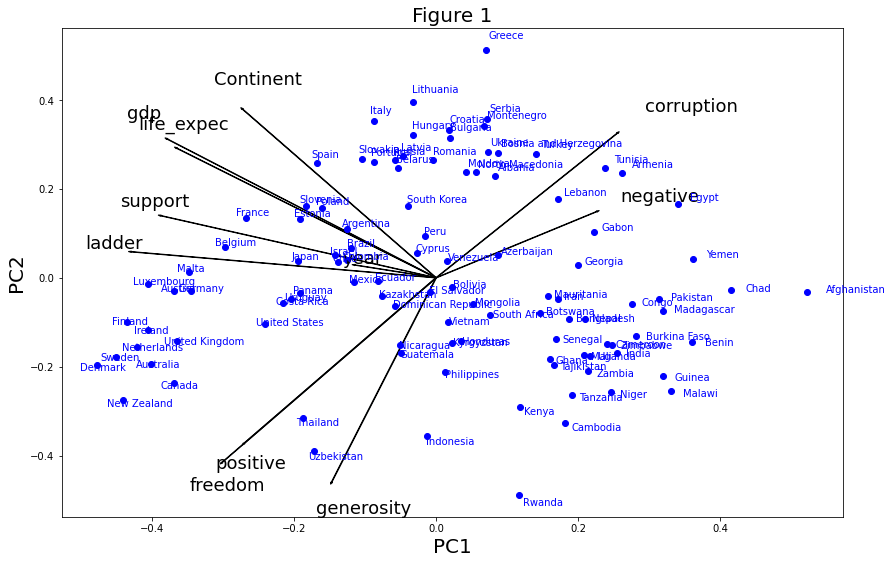

<Figure size 432x288 with 0 Axes>

In [20]:

#Creating a biplot to visualize the 106 countries,
#with respect to the feature variables and ladder outcome

pca = PCA(n_components=2)
PC_scores = pd.DataFrame(pca.fit_transform(df_country),
               columns = ['PC 1', 'PC 2'])
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], 
                        index=df_country.columns)


PC1 = pca.fit_transform(df_scaled1)[:,0]
PC2 = pca.fit_transform(df_scaled1)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = df_country.columns

fig, ax = plt.subplots(figsize=(14, 9))
z1 = PC1 * scalePC1
z2 = PC2 * scalePC2
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1.15, 
            ldngs[1, i] * 1.15, 
            feature, fontsize=18)
    

for i in range(106):
    plt.plot(z1[i], z2[i], 'bo')
    plt.text(z1[i]*1.05, z2[i]*1.05, list(countries.Country)[i], color='b')
    
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)
plt.figure()